# Gradient boost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dummy-data.csv")
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Label
0,0.1,0.5,0.8,0.2,0.9,0.3,0.4,0.7,0.6,0.2,-1
1,0.4,0.9,0.2,0.6,0.3,0.5,0.7,0.1,0.8,0.6,-1
2,0.7,0.3,0.6,0.4,0.8,0.2,0.9,0.5,0.1,0.3,1
3,0.9,0.6,0.1,0.8,0.4,0.7,0.2,0.3,0.5,0.9,1
4,0.3,0.2,0.9,0.7,0.1,0.8,0.5,0.4,0.6,0.7,-1


<Axes: xlabel='Label', ylabel='count'>

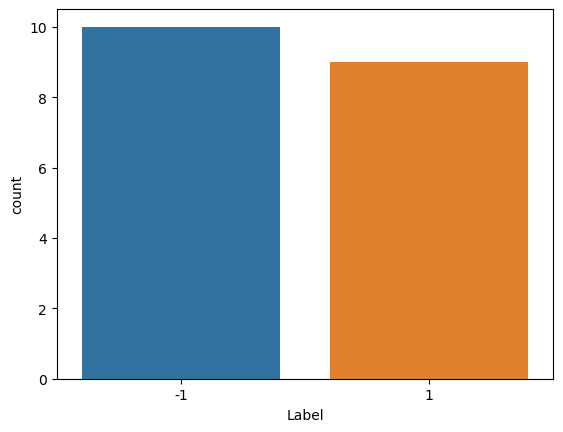

In [3]:
sns.countplot(data=df, x='Label')

## Train and Test splits

In [4]:
X = df.drop('Label', axis=1)
y = df['Label']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Gradient Boosting and Grid Search with CV

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
gb_model = GradientBoostingClassifier()

param_grid = {"n_estimators": [1, 40, 100], 'learning_rate': [0.1, 0.05, 0.2], 'max_depth': [3, 4, 5]}

grid = GridSearchCV(gb_model, param_grid)

### Fit to Training Data with CV Search

In [9]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [1, 40, 100]})

In [10]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1}

## Performance

In [11]:
from sklearn.metrics import classification_report

In [12]:
predictions = grid.predict(X_test)
predictions

array([-1,  1,  1], dtype=int64)

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [14]:
feat_import = grid.best_estimator_.feature_importances_
feat_import

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.42857143, 0.57142857])

In [15]:
imp_feats = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])
imp_feats

,Importance
Feature 1,0.000000
Feature 2,0.000000
Feature 3,0.000000
Feature 4,0.000000
Feature 5,0.000000
Feature 6,0.000000
Feature 7,0.000000
Feature 8,0.000000
Feature 9,0.428571
Feature 10,0.571429


In [16]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,10.0,0.1,0.213491,0.0,0.0,0.0,0.0,0.571429


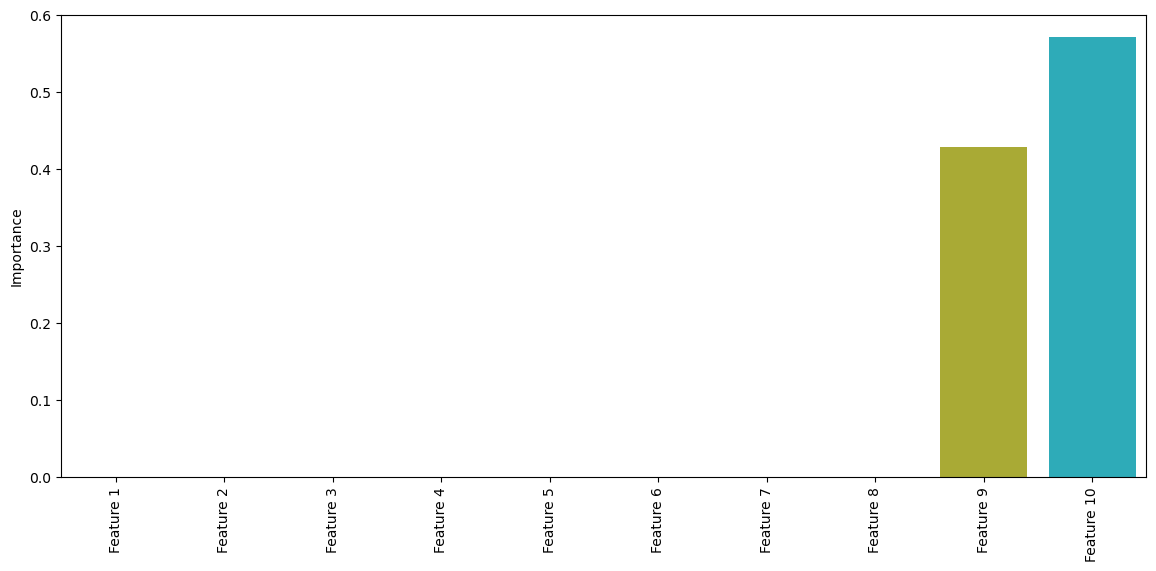

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);